In [22]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
plt.rc('figure', figsize=(10, 5))

In [23]:
#alterar eleitores por eleição

eleitores = 106101067

In [24]:
names = ['TRASH1', 'TRASH2', 'TRASH3', 'NR_TURNO', 'TRASH4',
'TRASH5', 'TRASH6', 'TRASH7', 'TRASH8', 'TRASH9', 'TRASH10', 'TRASH11',
'TRASH12', 'TRASH13', 'NM_URNA_CANDIDATO', 'DS_CARGO', 'TRASH14', 'TRASH15',
'TRASH16', 'TRASH17', 'TRASH18', 'TRASH19', 'TRASH20', 'SG_PARTIDO', 'TRASH21',
'TRASH22', 'TRASH23', 'TRASH24', 'QT_VOTOS_NOMINAIS']

In [25]:
df = pd.read_csv('votacao_candidato_munzona_1998_BR.txt', names = names, sep = ';', encoding='latin-1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
df.sample(1)

,TRASH1,TRASH2,TRASH3,NR_TURNO,TRASH4,TRASH5,TRASH6,TRASH7,TRASH8,TRASH9,TRASH10,TRASH11,TRASH12,TRASH13,NM_URNA_CANDIDATO,DS_CARGO,TRASH14,TRASH15,TRASH16,TRASH17,TRASH18,TRASH19,TRASH20,SG_PARTIDO,TRASH21,TRASH22,TRASH23,TRASH24,QT_VOTOS_NOMINAIS
33056,05/04/2016,16:29:22,1998,1,ELEICOES 1998,BR,NaN,79014,NaN,54,1,16,-1,JOSÉ MARIA DE ALMEIDA,ZÉ MARIA,PRESIDENTE,-1,#NE#,2,DEFERIDO,4,NÃO ELEITO,16,PSTU,PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,-1,#NULO#,#NE#,34


In [27]:

droplist = ['TRASH1', 'TRASH2', 'TRASH3', 'TRASH4',
'TRASH5', 'TRASH6', 'TRASH7', 'TRASH8', 'TRASH9', 'TRASH10', 'TRASH11',
'TRASH12', 'TRASH13', 'TRASH14', 'TRASH15',
'TRASH16', 'TRASH17', 'TRASH18', 'TRASH19', 'TRASH20', 'TRASH21',
'TRASH22', 'TRASH23', 'TRASH24']




In [28]:
df = df.drop(droplist, axis = 1)

In [29]:
df.sample(10)

,NR_TURNO,NM_URNA_CANDIDATO,DS_CARGO,SG_PARTIDO,QT_VOTOS_NOMINAIS
52358,1,CIRO GOMES,PRESIDENTE,PPS,213
8033,1,CIRO GOMES,PRESIDENTE,PPS,350
26887,1,SIRKIS,PRESIDENTE,PV,17
65136,1,SERGIO BUENO,PRESIDENTE,PSC,32
7000,1,FERNANDO HENRIQUE,PRESIDENTE,PSDB,1152
20290,1,SIRKIS,PRESIDENTE,PV,8
35327,1,SERGIO BUENO,PRESIDENTE,PSC,27
11714,1,CIRO GOMES,PRESIDENTE,PPS,216
46392,1,EYMAEL,PRESIDENTE,PSDC,27
59961,1,LULA,PRESIDENTE,PT,13894


### Filtro por Cargo

In [30]:
dfpresidente = df[df.DS_CARGO == 'PRESIDENTE']

# Primeiro Turno

In [31]:
#Escolher Turno
dfpresidente1turno = dfpresidente[dfpresidente.NR_TURNO == 1]
#Grupar por
votostotais1turno = dfpresidente1turno.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS'].sum().reset_index()
#Coluna Porcentagem
votostotais1turno['Porcentagem'] = votostotais1turno['QT_VOTOS_NOMINAIS']/eleitores * 100
#Ordenar
votostotais1turno = votostotais1turno.sort_values(by='QT_VOTOS_NOMINAIS',ascending = False)
#Votos Totais 1 Turno
v1 = votostotais1turno.QT_VOTOS_NOMINAIS.sum()

In [32]:
#Criação de Outros e mostrando somente os 5 primeiros

outros1 = votostotais1turno.QT_VOTOS_NOMINAIS[5:100].sum()
outros1p = votostotais1turno.Porcentagem[5:100].sum()

votostotais1turno = votostotais1turno[0:5].append({'SG_PARTIDO' : 'Outros' , 'NM_URNA_CANDIDATO' : 'Outros', 'QT_VOTOS_NOMINAIS' : outros1, 'Porcentagem' : outros1p } , ignore_index=True)

votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PSDB,FERNANDO HENRIQUE,35922534,33.856902
1,PT,LULA,21470326,20.235731
2,PPS,CIRO GOMES,7424780,6.997837
3,PRONA,ENÉAS,1446782,1.363589
4,PMN,BRIGADEIRO IVAN FROTA,251275,0.236826
5,Outros,Outros,1185690,1.117510


([<matplotlib.patches.Wedge at 0x21d30effc88>,
 [Text(-0.9981109831538914, -0.4623575081120372, 'Votos Totais'),
  Text(1.0888483452587905, 0.504390008849495, 'Não Votaram')],
 [Text(-0.5444241726293952, -0.2521950044247475, '63.8%'),
  Text(0.6351615347342945, 0.29422750516220536, '36.2%')])

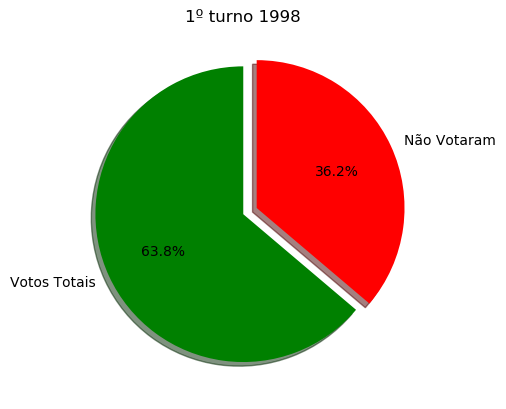

In [33]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()
labels = 'Votos Totais', 'Não Votaram'
sizes = [v1, (eleitores-v1)]
explode = (0.0, 0.1)
colors = ('g','r')
plt.pyplot.title('1º turno 1998')
plt.pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)


([<matplotlib.patches.Wedge at 0x21d3010e208>,
 [Text(-1.194458414140074, -0.11519156605402942, 'FERNANDO HENRIQUE'),
  Text(1.02062586763545, -0.4102716640390665, 'LULA'),
  Text(0.632109269785724, 0.9002432288281645, 'CIRO GOMES'),
  Text(0.23898777715377675, 1.1759612418660306, 'ENÉAS'),
  Text(0.20638139068869044, 1.6874260640328518, 'BRIGADEIRO IVAN FROTA'),
  Text(0.08798851138567579, 1.5975787998919282, 'Outros')],
 [Text(-0.6967674082483764, -0.06719508019818382, '53.1%'),
  Text(0.5567050187102455, -0.22378454402130898, '31.7%'),
  Text(0.3447868744285767, 0.4910417611789988, '11.0%'),
  Text(0.13940953667303643, 0.6859773910885179, '2.1%'),
  Text(0.145680981662605, 1.1911242804937776, '0.4%'),
  Text(0.0604921015776521, 1.0983354249257005, '1.8%')])

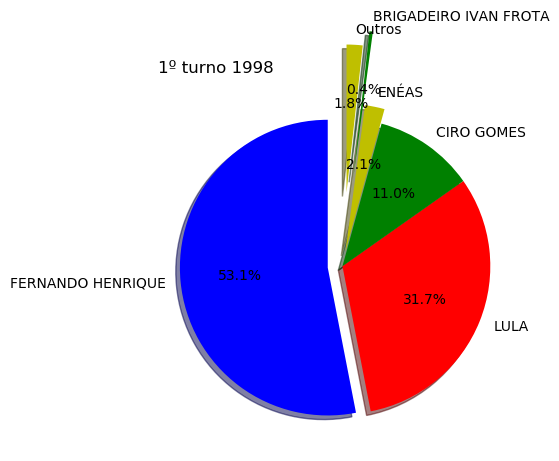

In [34]:
#Grafico de Pizza
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()
labels = votostotais1turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.1, 0.0, 0.0, 0.1, 0.6, 0.5)
colors = ('b', 'r', 'g', 'y', 'g', 'y')

plt.pyplot.title('1º turno 1998', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)


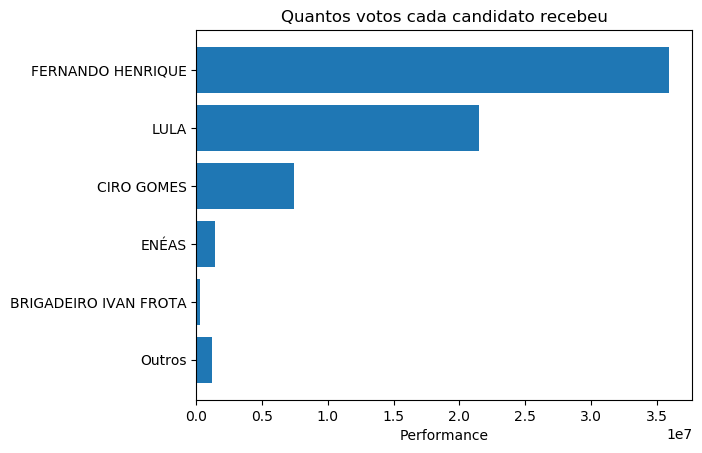

In [14]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais1turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

In [15]:
votostotais1turno = votostotais1turno.append({'SG_PARTIDO' : 'Não Votaram' , 'NM_URNA_CANDIDATO' : 'Não Votaram', 'QT_VOTOS_NOMINAIS' : (eleitores-v1), 
                                              'Porcentagem' : 100-votostotais1turno.Porcentagem.sum() } , ignore_index=True)
votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PSDB,FERNANDO HENRIQUE,35922534,33.856902
1,PT,LULA,21470326,20.235731
2,PPS,CIRO GOMES,7424780,6.997837
3,PRONA,ENÉAS,1446782,1.363589
4,PMN,BRIGADEIRO IVAN FROTA,251275,0.236826
5,Outros,Outros,1185690,1.117510
6,Não Votaram,Não Votaram,38399680,36.191606


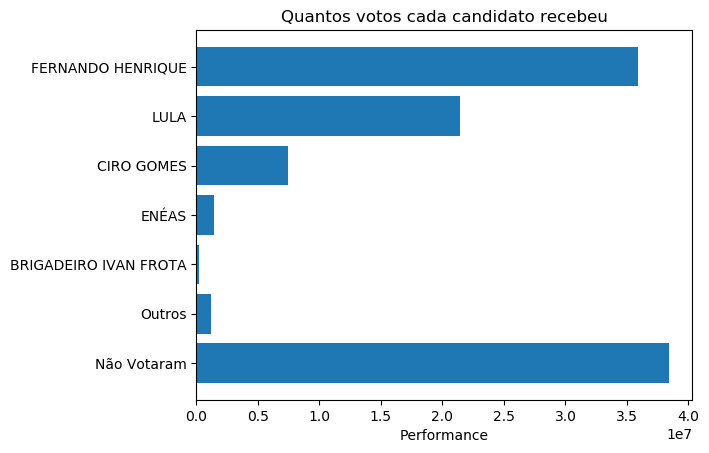

In [16]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais1turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

([<matplotlib.patches.Wedge at 0x21d308cda48>,
 [Text(-0.9615452817240335, 0.5342571208643354, 'FERNANDO HENRIQUE'),
  Text(-0.4065580652608388, -1.0221108254838922, 'LULA'),
  Text(0.5050190416210649, -0.97721838275799, 'CIRO GOMES'),
  Text(0.7414510715639603, -0.8125578800778781, 'ENÉAS'),
  Text(0.7813510873426647, -0.7742677045495542, 'BRIGADEIRO IVAN FROTA'),
  Text(0.8135773365570953, -0.7403323020378505, 'Outros'),
  Text(0.9981110602624698, 0.46235734165440556, 'Não Votaram')],
 [Text(-0.5244792445767454, 0.2914129750169102, '33.9%'),
  Text(-0.22175894468773025, -0.5575149957184866, '20.2%'),
  Text(0.2754649317933081, -0.5330282087770853, '7.0%'),
  Text(0.40442785721670554, -0.443213389133388, '1.4%'),
  Text(0.42619150218690793, -0.4223278388452113, '0.2%'),
  Text(0.4437694563038701, -0.40381761929337295, '1.1%'),
  Text(0.5444242146886198, 0.2521949136296757, '36.2%')])

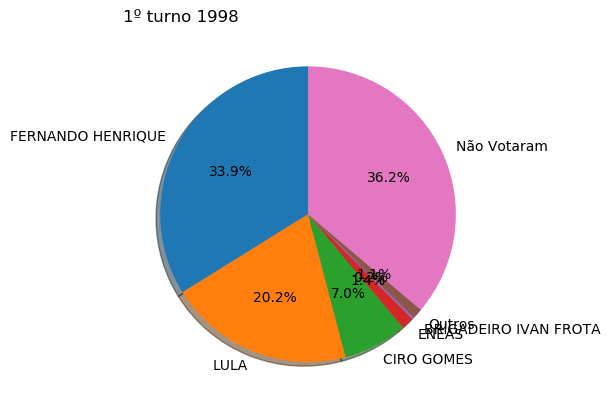

In [20]:
#Grafico de Pizza

labels = votostotais1turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()
# explode = (0.0, 0.1, 0.1

plt.pyplot.title('1º turno 1998', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Salvar os Arquivos CSV

In [18]:
votostotais1turno['Ano'] = 1998
votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem,Ano
0,PSDB,FERNANDO HENRIQUE,35922534,33.856902,1998
1,PT,LULA,21470326,20.235731,1998
2,PPS,CIRO GOMES,7424780,6.997837,1998
3,PRONA,ENÉAS,1446782,1.363589,1998
4,PMN,BRIGADEIRO IVAN FROTA,251275,0.236826,1998
5,Outros,Outros,1185690,1.117510,1998
6,Não Votaram,Não Votaram,38399680,36.191606,1998


In [19]:
votostotais1turno.to_csv('1turno_1998.csv')